In [1]:
from analysis.get_dataframe_from_results import get_pandas_dataset
from analysis.dataset_graphs import plot_graphs_of_dataset_loc
from analysis.get_tables_results import create_table_cleaned
from analysis.get_results import bar_chart_fix_position_cleaned
from analysis.get_results import sucess_vs_position_cleaned, get_latex_table_with_verif_stats
from analysis.get_results import compute_stats_tests

import utils.global_variables as gl
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [2]:
RESULT_DIR = gl.BASE_PATH / "results/dafny_llm_results_rq3__example_gatherer"
DATASET_DIR = gl.DAFNY_ASSERTION_DATASET

print(DATASET_DIR)
print(RESULT_DIR)
verif_data_pd = get_pandas_dataset(DATASET_DIR, RESULT_DIR)
verif_data_pd  = verif_data_pd.assign(success=lambda d: d['verif_sucess'] > 0) 

/home/ricostynha/Desktop/daisy/dataset/dafny_assertion_dataset
/home/ricostynha/Desktop/daisy/results/dafny_llm_results_rq3__example_gatherer


<>:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
<>:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
/tmp/ipykernel_74132/2579554544.py:19: SyntaxWarning: "\l" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\l"? A raw string is also an option.
  info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate for each approach for each category of benchmarks for the example retrieval strategy on the ground truth positions (\lgroundT{}).", "tbl:assertion-inference-verification-example", test_models)



\begin{table}[!t]
\begin{center}
\small
\caption{Verification success rate for each approach for each category of benchmarks for the example retrieval strategy on the ground truth positions (\lgroundT{}).}
\label{tbl:assertion-inference-verification-example}
\begin{tabular}{|l|c|c|c|c|}
\hline
\multirow{2}{*}{Approach} & \multicolumn{4}{c|}{Benchmarks} \\
\cline{2-5}
 & w/o-1 (236) & w/o-2 (184) & All (28) & Combined (448) \\
\hline
NoEx$_{in}$ & 140 (59.0\%) & \phantom{0}38 (20.0\%) & \phantom{00}4 (14.0\%) & 182 (40.6\%) \\
Random$_{in}$ & 141 (59.0\%) & \phantom{0}38 (20.0\%) & \phantom{00}5 (17.0\%) & 184 (41.1\%) \\
MulEmb1.00$_{in}$ & 161 (68.0\%) & \phantom{0}46 (25.0\%) & \phantom{00}5 (17.0\%) & 212 (47.3\%) \\
Embed$_{in}$ & 165 (69.0\%) & \phantom{0}44 (23.0\%) & \phantom{00}6 (21.0\%) & 215 (48.0\%) \\
Tfidf$_{in}$ & 166 (70.0\%) & \phantom{0}44 (23.0\%) & \phantom{00}8 (28.0\%) & 218 (48.7\%) \\
MulEmb0.50$_{in}$ & 161 (68.0\%) & \phantom{0}52 (28.0\%) & \phantom{00}7 (25

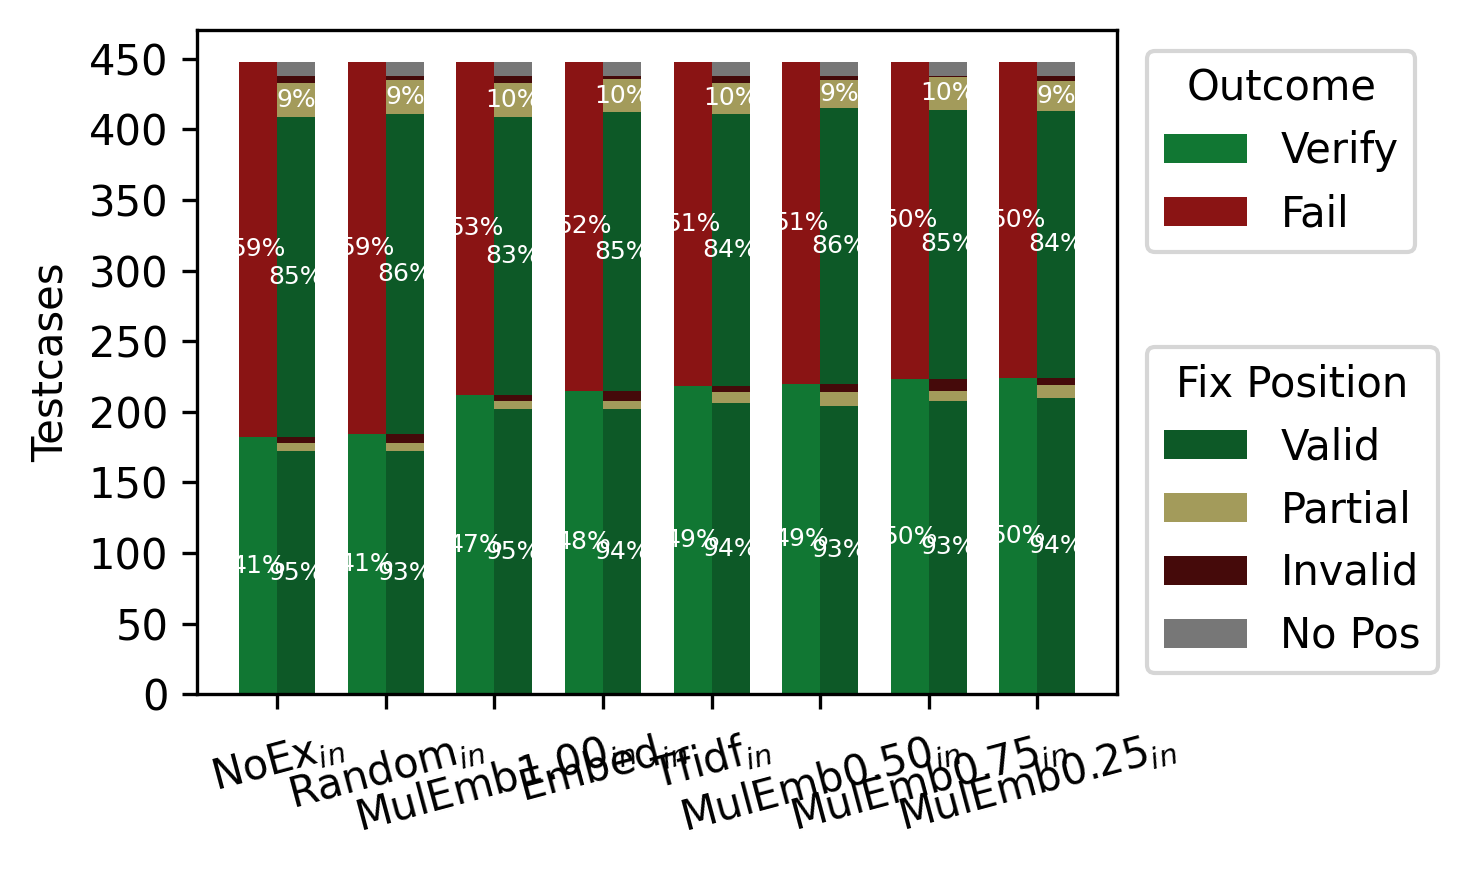

In [3]:
# Graphs of position evaluation
test_models ={ 
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_ExType_ExampleStrategies.NONE_loc_LocStrategies.ORACLE" : "NoEx$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_ExType_ExampleStrategies.RANDOM_loc_LocStrategies.ORACLE" : "Random$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_1_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.ORACLE" : "MulEmb1.00$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_ExType_ExampleStrategies.EMBEDDED_loc_LocStrategies.ORACLE" : "Embed$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_ExType_ExampleStrategies.TFIDF_loc_LocStrategies.ORACLE" : "Tfidf$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.5_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.ORACLE" : "MulEmb0.50$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.75_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.ORACLE" : "MulEmb0.75$_{in}$",
"claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.ORACLE" : "MulEmb0.25$_{in}$",
}

# Filter if interested in per benchmark test
#verif_data_pd = verif_data_pd[verif_data_pd["benchmark"] != "w/o-1"]

dual_name = "rq3__example_gatherer_sucess_vs_position.pdf"
images_p = gl.BASE_PATH / "images"

info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate for each approach for each category of benchmarks for the example retrieval strategy on the ground truth positions (\lgroundT{}).", "tbl:assertion-inference-verification-example", test_models)
print(info)
sucess_vs_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / dual_name)

In [4]:
verif_renamed = verif_data_pd.copy()
verif_renamed["llm"] = verif_renamed["llm"].map(test_models)

print("##### Comparing NoEx$_{in}$ with Random$_{in} #####")
compute_stats_tests("NoEx$_{in}$","Random$_{in}$", verif_renamed)

print("##### Comparing MulEmb0.25$_{in}$ with NoEx$_{in} #####\n")
compute_stats_tests("NoEx$_{in}$","MulEmb0.25$_{in}$", verif_renamed)

print("##### Comparing MulEmb0.25$_{in}$ with Tfidf$_{in}$ #####\n")
compute_stats_tests("Tfidf$_{in}$","MulEmb0.25$_{in}$", verif_renamed)

##### Comparing NoEx$_{in}$ with Random$_{in} #####

--- McNemar Matrix [[d,c],[b,a]]: ---
[[228, 38], [36, 146]]

--- Results McNemar (is one better than the other) ---
pvalue      0.9075606176124984
statistic   36.0
Agreements (d): NoEx$_{in}$ Failures, Random$_{in}$ Failure: 228
Agreements (a): NoEx$_{in}$ Success, Random$_{in}$ Success: 146
Disagreements (b): NoEx$_{in}$ Success, Random$_{in}$ Failure: 36
Disagreements (c): NoEx$_{in}$ Failure, Random$_{in}$ Success: 38
P-Value: 0.9075606176124984
!!! Models are not statistically different (they are equal in efficacy) !!!

--- Results Chi-squared Test of Independence are they independent ---
--- Chi-Squared Matrix [[d,c],[b,a]]: ---
[[228, 38], [36, 146]]
--- Chi-Squared Test Results ---
Chi-Squared Statistic: 191.3869
P-Value: 0.0000
Degrees of Freedom: 1
Expected Frequencies (if independent):
[[156.75 109.25]
 [107.25  74.75]]
!!! Models are not independent !!!
Effect Sizes
Phi (φ) Coefficient: 0.654
Jaccard Index (Overlap): 0.66